# Классификатор CatBoost в Python

В этом ядре мы обсудим библиотеку с открытым исходным кодом - CatBoost, разработанную и предоставленную Яндексом. CatBoost может напрямую использовать категориальные функции и масштабируемый по своей природе.

## 1. Введение в CatBoost


В документации CatBoost(https://catboost.ai/) говорится, что:

«<b>CatBoost</b> - это высокопроизводительная библиотека с открытым исходным кодом для повышения градиента на деревьях решений».

Итак, <b>CatBoost</b> - это алгоритм повышения градиента на деревьях решений.
Это готовый классификатор в терминах соглашений scikit-learn, который автоматически обрабатывает категориальные особенности.
Его можно легко интегрировать с фреймворками глубокого обучения, такими как Google TensorFlow и Apple Core ML.
Он может работать с различными типами данных, чтобы помочь решить широкий спектр проблем (описанных ниже), с которыми сегодня сталкиваются предприятия.
Он разработан исследователями и инженерами <b>Яндекса</b> и используется для <i>поиска, систем рекомендаций, личного помощника, беспилотных автомобилей, прогнозирования погоды и многих других задач</i>.
Кроме того, он обеспечивает лучшую в своем классе точность.
Он особенно силен по двум причинам:
1. Он дает самые современные результаты без обширной тренировки данных, обычно необходимой для других методов машинного обучения.

2. Обеспечивает мощную готовую поддержку более описательных форматов данных, которые связаны со многими бизнес-проблемами.

Название «CatBoost» происходит от двух слов - «Категория» и «Повышение».
Он хорошо работает с несколькими категориями данных, такими как аудио, текст, изображение, включая исторические данные.
«Boost» происходит от алгоритма машинного обучения повышения градиента, поскольку эта библиотека основана на библиотеке повышения градиента. Повышение градиента - это мощный алгоритм машинного обучения, который широко применяется для решения различных бизнес-задач, таких как обнаружение мошенничества, рекомендации, прогнозирование, и он также хорошо работает. Он также может давать очень хорошие результаты с относительно меньшим объемом данных, в отличие от моделей DL, которым необходимо учиться на огромном количестве данных.
Он находится в открытом доступе и может использоваться кем угодно.

## 2. Преимущества библиотеки CatBoost

Преимущества библиотеки CatBoost следующие: 
<ul><li>
    <b>Производительность:</b></li> CatBoost обеспечивает высочайшие результаты и по производительности не уступает любому ведущему алгоритму машинного обучения.
    <li><b>Автоматическая обработка категориальных функций:</b></li> мы можем использовать CatBoost без какой-либо явной предварительной обработки для преобразования категорий в числа. CatBoost преобразует категориальные значения в числа, используя различную статистику комбинаций категориальных характеристик и комбинаций категориальных и числовых характеристик.
    <li><b>Надежность: </b></li>снижает потребность в обширной настройке гиперпараметров, а также снижает вероятность переобучения, что приводит к более обобщенным моделям. Хотя CatBoost имеет несколько параметров для настройки, и он содержит такие параметры, как количество деревьев, скорость обучения, регуляризация, глубина дерева, размер складки, температура упаковки и другие.
<li><b>Простота использования:</b></li> мы можем использовать CatBoost из командной строки, используя удобный API для Python и R.
    </ul>

## 3. Сравнение CatBoost и других алгоритмов повышения.

У нас есть несколько библиотек повышения, таких как XGBoost, H2O и LightGBM, и все они хорошо справляются с различными проблемами.

Разработчик CatBoost сравнил производительность с конкурентами на стандартных наборах данных машинного обучения.

Это сравнение изображено на следующей диаграмме:

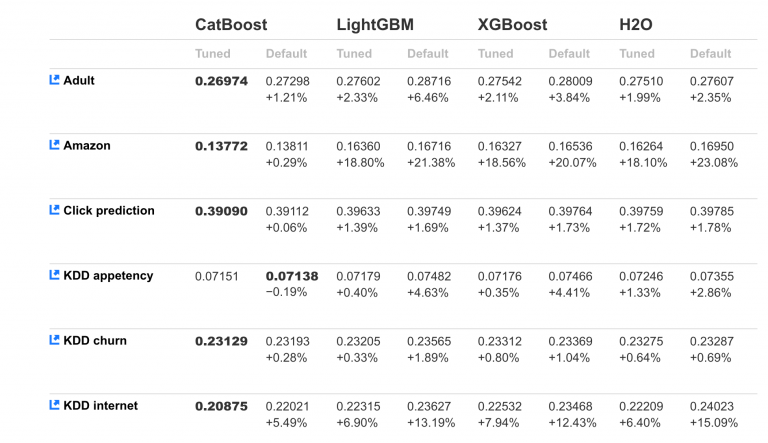

Приведенное выше сравнение показывает значение потери журнала для тестовых данных, и в большинстве случаев оно является самым низким в случае CatBoost. Это явно означает, что CatBoost в основном работает лучше как для настроенных моделей, так и для моделей по умолчанию.

В дополнение к этому CatBoost не требует преобразования набора данных в какой-либо конкретный формат, такой как XGBoost и LightGBM.

## 4. Реализация CatBoost на Python.
Теперь мы представим реализацию CatBoost на Python.
Первый шаг - загрузить необходимые библиотеки.

### 4.1 Загрузка библиотек


In [1]:
import numpy as np 
import pandas as pd

### 4.2 Чтение набора данных

In [26]:
train_df = pd.read_csv('train.csv')

In [27]:
test_df = pd.read_csv('test.csv')

### 4.3 Разведка набора данных

In [28]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [29]:
test_df.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


#### Просмотр уникальных значений в наборе данных

In [32]:
train_df.nunique()

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [33]:
test_df.nunique()

id                  58921
RESOURCE             4971
MGR_ID               4689
ROLE_ROLLUP_1         126
ROLE_ROLLUP_2         177
ROLE_DEPTNAME         466
ROLE_TITLE            351
ROLE_FAMILY_DESC     2749
ROLE_FAMILY            68
ROLE_CODE             351
dtype: int64

## 4.4 Подготовка данных

In [34]:
X = train_df.drop("ACTION", axis=1)
y = train_df["ACTION"]

#### Объявление категориальных признаков

In [35]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


## 4.5 Разделение данных на набор для обучения и проверки

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

## 4.6 Реализация CatBoost

In [37]:
pip install catboost

In [38]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
    #verbose=5,
)
clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
)

Learning rate set to 0.5
0:	learn: 0.3971379	test: 0.3960691	best: 0.3960691 (0)	total: 70.6ms	remaining: 635ms
1:	learn: 0.2948071	test: 0.2924021	best: 0.2924021 (1)	total: 89.7ms	remaining: 359ms
2:	learn: 0.2485317	test: 0.2454599	best: 0.2454599 (2)	total: 105ms	remaining: 246ms
3:	learn: 0.2234301	test: 0.2191836	best: 0.2191836 (3)	total: 120ms	remaining: 180ms
4:	learn: 0.1999100	test: 0.1935203	best: 0.1935203 (4)	total: 134ms	remaining: 134ms
5:	learn: 0.1911956	test: 0.1831193	best: 0.1831193 (5)	total: 148ms	remaining: 98.9ms
6:	learn: 0.1854231	test: 0.1763719	best: 0.1763719 (6)	total: 163ms	remaining: 70ms
7:	learn: 0.1818392	test: 0.1732419	best: 0.1732419 (7)	total: 178ms	remaining: 44.5ms
8:	learn: 0.1789139	test: 0.1679366	best: 0.1679366 (8)	total: 196ms	remaining: 21.8ms
9:	learn: 0.1777264	test: 0.1656210	best: 0.1656210 (9)	total: 212ms	remaining: 0us

bestTest = 0.1656210392
bestIteration = 9



In [39]:
clf.score(X_val,y_val)

0.9453768690875801

In [40]:
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    loss_function='CrossEntropy'
)


clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_val, y_val)
)

0:	learn: 0.6189489	test: 0.6187790	best: 0.6187790 (0)	total: 15.7ms	remaining: 62.8ms
1:	learn: 0.5585414	test: 0.5579742	best: 0.5579742 (1)	total: 35.5ms	remaining: 53.2ms
2:	learn: 0.5083288	test: 0.5075307	best: 0.5075307 (2)	total: 43.5ms	remaining: 29ms
3:	learn: 0.4661280	test: 0.4649882	best: 0.4649882 (3)	total: 56ms	remaining: 14ms
4:	learn: 0.4305277	test: 0.4291119	best: 0.4291119 (4)	total: 69.5ms	remaining: 0us

bestTest = 0.4291119343
bestIteration = 4



In [41]:
clf.score(X_val,y_val)

0.9432407689960329

## 4.8 Прогнозы модели

In [42]:
print(clf.predict_proba(data=X_val))

[[0.31848601 0.68151399]
 [0.31848601 0.68151399]
 [0.31848601 0.68151399]
 ...
 [0.32618847 0.67381153]
 [0.31848601 0.68151399]
 [0.31848601 0.68151399]]


In [43]:
print(clf.predict(data=X_val))

[1 1 1 ... 1 1 1]


In [53]:
test_df=test_df.drop('id',axis=1)




KeyError: "['id'] not found in axis"

In [56]:
test_df['ACTION'] = clf.predict(X_val)

ValueError: Length of values (6554) does not match length of index (58921)

In [51]:

b=test_df['ACTION']
a=test_df.drop('ACTION',axis=1)
clf.score(a,b)

NameError: name 'a' is not defined

KeyError: 'ACTION'

In [50]:
action=clf.predict(data=test_df)
test_df=test_df.assign(action=action)

In [20]:
test_df

NameError: name 'test_df' is not defined

## 4.9 Расчет показателей и построение графиков

In [57]:
clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=False,
   
)

In [58]:
clf.score(X_val,y_val)

0.9476655477570949

In [59]:
clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss='AUC'
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    
   
)

0:	learn: 0.3969305	test: 0.3945769	best: 0.3945769 (0)	total: 40.3ms	remaining: 1.98s
1:	learn: 0.2933475	test: 0.2899251	best: 0.2899251 (1)	total: 62.6ms	remaining: 1.5s
2:	learn: 0.2466417	test: 0.2428163	best: 0.2428163 (2)	total: 79.5ms	remaining: 1.25s
3:	learn: 0.2142165	test: 0.2071024	best: 0.2071024 (3)	total: 96.6ms	remaining: 1.11s
4:	learn: 0.1971563	test: 0.1891439	best: 0.1891439 (4)	total: 111ms	remaining: 999ms
5:	learn: 0.1893637	test: 0.1803756	best: 0.1803756 (5)	total: 125ms	remaining: 920ms
6:	learn: 0.1834200	test: 0.1736867	best: 0.1736867 (6)	total: 140ms	remaining: 863ms
7:	learn: 0.1817676	test: 0.1716030	best: 0.1716030 (7)	total: 155ms	remaining: 812ms
8:	learn: 0.1798745	test: 0.1695556	best: 0.1695556 (8)	total: 168ms	remaining: 763ms
9:	learn: 0.1771475	test: 0.1655671	best: 0.1655671 (9)	total: 182ms	remaining: 730ms
10:	learn: 0.1755969	test: 0.1635876	best: 0.1635876 (10)	total: 196ms	remaining: 695ms
11:	learn: 0.1752024	test: 0.1630648	best: 0.1630

In [60]:
from catboost import CatBoostClassifier, Pool


model = CatBoostClassifier(learning_rate=0.03)

model.fit(X_train, y_train,
    cat_features=cat_feat ures,
    verbose=False,
    plot=True)

SyntaxError: invalid syntax (Temp/ipykernel_5924/3142619340.py, line 7)